In [181]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt



dataset = pd.read_csv('food_prices.csv', comment='#')


# All regression models based on retail

dataset = dataset[(dataset['pricetype'] == 'Retail') & (dataset['priceflag'] == 'actual')]


dataset['date'] = pd.to_datetime(dataset['date'])
#using only from 2021 above kay wtf grabe increase prices 
dataset = dataset[dataset['date'].dt.year >= 2021]

dataset['days_since'] = (dataset['date'] - dataset['date'].min()).dt.days




MSE: 179.9240347302565
R²: 0.08214461971346398
RMSE: 13.413576507787045
MAE: 11.885058486685697


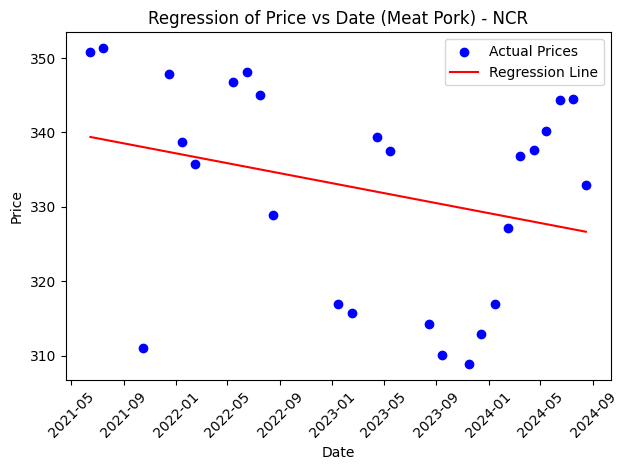

         date  predicted_price
0  2024-09-01       326.463375
1  2024-10-01       326.133136
2  2024-11-01       325.791889
3  2024-12-01       325.461650
4  2025-01-01       325.120404
5  2025-02-01       324.779157
6  2025-03-01       324.470934
7  2025-04-01       324.129687
8  2025-05-01       323.799448
9  2025-06-01       323.458201
10 2025-07-01       323.127962
11 2025-08-01       322.786715
12 2025-09-01       322.445468
13 2025-10-01       322.115229
14 2025-11-01       321.773982
15 2025-12-01       321.443743
16 2026-01-01       321.102496
17 2026-02-01       320.761250
18 2026-03-01       320.453027
19 2026-04-01       320.111780
20 2026-05-01       319.781541
21 2026-06-01       319.440294
22 2026-07-01       319.110055
23 2026-08-01       318.768808
24 2026-09-01       318.427561
25 2026-10-01       318.097322
26 2026-11-01       317.756075
27 2026-12-01       317.425836
28 2027-01-01       317.084589
29 2027-02-01       316.743342
30 2027-03-01       316.435119
31 2027-

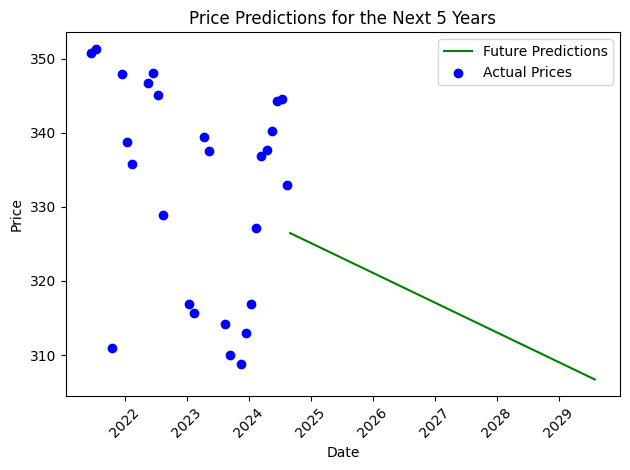

In [193]:
# Regression model for Meat (pork) for NCR

filtered_data = dataset[
    dataset['commodity'].str.contains(r'Meat \(pork\)', case=False, na=False) &
    (dataset['admin1'] == 'National Capital region')
]

# Prepare features and target for the regression model
X = filtered_data[['days_since']]  # Ensure it's a DataFrame
y = filtered_data['price']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the price for existing data
y_pred = model.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# actual data points
plt.scatter(filtered_data['date'], y, color='blue', label='Actual Prices')

# regression line based on actual data
plt.plot(filtered_data['date'], model.predict(X), color='red', label='Regression Line')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Regression of Price vs Date (Meat Pork) - NCR')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  prices for the next 5 years
future_dates = pd.date_range(start=filtered_data['date'].max(), periods=5 * 12, freq='MS')  # Monthly predictions for 5 years
future_days_since = (future_dates - dataset['date'].min()).days
future_days_since_df = pd.DataFrame(future_days_since, columns=['days_since'])

future_predictions = model.predict(future_days_since_df)

# Combine future dates and predictions into a DataFrame
future_df = pd.DataFrame({
    'date': future_dates,
    'predicted_price': future_predictions
})


print(future_df)

# future predictions
plt.plot(future_df['date'], future_df['predicted_price'], color='green', label='Future Predictions')
plt.scatter(filtered_data['date'], y, color='blue', label='Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Predictions for the Next 5 Years')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
